# 16S Metagenomics — Part 1 (Short Report)

## Paper / Dataset
Paper: *“The 16S rRNA gene amplicon data set from seawater in Ushuaia Bay and the Beagle Channel (Argentina)”*  


Publisher (ScienceDirect):
https://www.sciencedirect.com/science/article/pii/S2352340920310659


# BioProject PRJNA637656

NCBI BioProject:
https://www.ncbi.nlm.nih.gov/bioproject/PRJNA637656

NCBI SRA search (all runs in the project):
https://www.ncbi.nlm.nih.gov/sra?term=PRJNA637656

ENA browser (project overview + FASTQ links):
https://www.ebi.ac.uk/ena/browser/view/PRJNA637656

All FASTQs and metadata were downloaded automatically from ENA.

## What We Did (Pipeline Summary)

### 1. Data Acquisition
Downloaded all 10 FASTQ pairs and created a metadata table  
(sample_id, experiment_accession, sample_accession, library layout, instrument).  
Files were saved under `data/` and cached in `work/run_tbl.rds`.

### 2. Primer / Adapter Check
Scanned 2000 reads per sample using Biostrings/ShortRead.  
Illumina + V4 16S primer sequences were detected → trimming required.

### 3. Adapter / Primer Removal
Performed trimming using **cutadapt** with minimum read length 50 bp.  
Clean FASTQs stored in `work/cutadapt/`.

### 4. Quality Control
Computed `plotQualityProfile()` for forward and reverse reads.  
Profiles showed typical Illumina shapes with gradual end-quality decline.

### 5. DADA2 Pipeline
Steps executed:
- `filterAndTrim()` (truncLen = 150,150; maxEE = 3,3)  
- Error learning (`learnErrors()`) for F and R  
- Denoising (`dada()`) for all 10 samples  
- `mergePairs()` (low merge rate expected due to short overlap)  
- `makeSequenceTable()`  
- `removeBimeraDenovo()`

**Final ASV count: 21 non-chimeric ASVs**

Tracking outputs written to:  
`work/read_tracking.tsv`,  
`reads_per_sample_final.tsv`,  
`asv_per_sample.tsv`.

### 6. Taxonomy (SILVA 138.1)
Used SILVA v138.1 train set + species file.  
Assigned taxonomy for all ASVs; some remained unclassified at the genus level (common in seawater datasets).

### 7. Phyloseq Object
- Renamed ASVs to `sp1`–`sp21`  
- Saved sequences: `ASVs_sp.fasta`  
- Constructed phyloseq object containing:  
  - OTU table (21 taxa × 10 samples)  
  - Taxonomy table (7 ranks)  
  - Sample metadata (10 samples × 6 variables)  
  - Reference DNA sequences  

Exported as: `work/phyloseq_object.rds`.

## Main Outcome
A full, reproducible ASV processing workflow for **PRJNA637656** was completed.  
The final dataset contains **21 high-confidence ASVs** across 10 seawater samples, annotated using SILVA, and packaged in a ready-to-use **phyloseq** object for ecological and diversity analyses.

In [ ]:


is_installed <- function(pkg) {
  requireNamespace(pkg, quietly = TRUE)
}

if (!is_installed("BiocManager")) {
  cat("Installing BiocManager...\n")
  install.packages("BiocManager", repos = "https://cran.rstudio.com/", verbose = TRUE)
  cat("BiocManager installed successfully!\n\n")
} else {
  cat("BiocManager already installed.\n")
}

cran_packages <- c("tidyverse", "vegan")
missing_cran <- cran_packages[!sapply(cran_packages, is_installed)]

if (length(missing_cran) > 0) {
  cat(sprintf("Installing CRAN packages: %s\n", paste(missing_cran, collapse = ", ")))
  install.packages(missing_cran, repos = "https://cran.rstudio.com/", verbose = TRUE)
  cat("CRAN packages installed successfully!\n\n")
} else {
  cat("All CRAN packages already installed.\n")
}

bioc_packages <- c("dada2", "phyloseq")
missing_bioc <- bioc_packages[!sapply(bioc_packages, is_installed)]

if (length(missing_bioc) > 0) {
  cat(sprintf("Installing Bioconductor packages: %s\n", paste(missing_bioc, collapse = ", ")))
  cat("This may take several minutes...\n")
  BiocManager::install(missing_bioc, update = FALSE, ask = FALSE)
  cat("Bioconductor packages installed successfully!\n\n")
} else {
  cat("All Bioconductor packages already installed.\n")
}




=== Checking and installing required packages ===
Installing BiocManager...


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

system (cmd0): /usr/lib/R/bin/R CMD INSTALL

foundpkgs: BiocManager, /tmp/RtmpTrNHEh/downloaded_packages/BiocManager_1.30.27.tar.gz

files: /tmp/RtmpTrNHEh/downloaded_packages/BiocManager_1.30.27.tar.gz

1): succeeded '/usr/lib/R/bin/R CMD INSTALL -l '/usr/local/lib/R/site-library' '/tmp/RtmpTrNHEh/downloaded_packages/BiocManager_1.30.27.tar.gz''



BiocManager installed successfully!

Installing CRAN packages: vegan


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

system (cmd0): /usr/lib/R/bin/R CMD INSTALL

also installing the dependency ‘permute’


foundpkgs: permute, vegan, /tmp/RtmpTrNHEh/downloaded_packages/permute_0.9-8.tar.gz, /tmp/RtmpTrNHEh/downloaded_packages/vegan_2.7-2.tar.gz

files: /tmp/RtmpTrNHEh/downloaded_packages/permute_0.9-8.tar.gz, 
	/tmp/RtmpTrNHEh/downloaded_packages/vegan_2.7-2.tar.gz

1): succeeded '/usr/lib/R/bin/R CMD INSTALL -l '/usr/local/lib/R/site-library' '/tmp/RtmpTrNHEh/downloaded_packages/permute_0.9-8.tar.gz''

2): succeeded '/usr/lib/R/bin/R CMD INSTALL -l '/usr/local/lib/R/site-library' '/tmp/RtmpTrNHEh/downloaded_packages/vegan_2.7-2.tar.gz''



CRAN packages installed successfully!

Installing Bioconductor packages: dada2, phyloseq
This may take several minutes...


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.27), R 4.5.2 (2025-10-31)

Installing package(s) 'BiocVersion', 'dada2', 'phyloseq'

also installing the dependencies ‘formatR’, ‘matrixStats’, ‘abind’, ‘SparseArray’, ‘lambda.r’, ‘futile.options’, ‘MatrixGenerics’, ‘S4Arrays’, ‘DelayedArray’, ‘deldir’, ‘RcppEigen’, ‘futile.logger’, ‘snow’, ‘BH’, ‘bitops’, ‘SummarizedExperiment’, ‘cigarillo’, ‘png’, ‘jpeg’, ‘interp’, ‘Rhdf5lib’, ‘rhdf5filters’, ‘S4Vectors’, ‘Seqinfo’, ‘BiocParallel’, ‘Rsamtools’, ‘GenomicAlignments’, ‘GenomicRanges’, ‘pwalign’, ‘hwriter’, ‘latticeExtra’, ‘Rhtslib’, ‘pixmap’, ‘sp’, ‘RcppArmadillo’, ‘rhdf5’, ‘iterators’, ‘Biostrings’, ‘reshape2’, ‘ShortRead’, ‘RcppParallel’, ‘IRanges’, ‘XVector’, ‘BiocGenerics’, ‘ade4’, ‘ape’, ‘Biobase’, ‘biomformat’, ‘foreach’, ‘igraph’, ‘multtest’, ‘ply

Bioconductor packages installed successfully!

=== All required packages are ready ===



In [ ]:
# =========================
# PART A — DOWNLOAD / SETUP
# =========================

# 1) Paper + Data Links
paper_title <- "The 16S rRNA gene amplicon data set from seawater in Ushuaia Bay and surrounding waters in the Beagle Channel (Argentina)"
bioproject  <- "PRJNA637656"
runs <- c("SRR11941686","SRR11941687","SRR11941688","SRR11941689","SRR11941690",
          "SRR11941691","SRR11941692","SRR11941693","SRR11941694","SRR11941695")

ena_readrun_url <- function(run) {
  paste0(
    "https://www.ebi.ac.uk/ena/portal/api/filereport?accession=", run,
    "&result=read_run&fields=run_accession,fastq_ftp,fastq_md5,library_layout,experiment_accession,sample_accession,instrument_model",
    "&format=tsv"
  )
}

progress_init <- function(labels, weights) {
  stopifnot(length(labels) == length(weights))
  w <- weights / sum(weights)
  list(labels = labels, w = w, done = rep(FALSE, length(labels)),
       sec = rep(NA_real_, length(labels)), t0 = proc.time()[["elapsed"]])
}

progress_step <- function(p, i, elapsed_sec) {
  p$done[i] <- TRUE
  p$sec[i] <- elapsed_sec
  t_elapsed <- sum(p$sec[p$done], na.rm = TRUE)
  w_done <- sum(p$w[p$done])
  total_est <- if (w_done > 0) t_elapsed / w_done else NA_real_
  rem_est <- if (is.finite(total_est)) total_est - t_elapsed else NA_real_
  cat(sprintf("\n[%d/%d] %s\n", sum(p$done), length(p$done), p$labels[i]))
  cat(sprintf("Elapsed: %s | Estimated remaining: %s | Total est.: %s\n",
              format(as.difftime(t_elapsed, units="secs")),
              format(as.difftime(max(rem_est, 0), units="secs")),
              format(as.difftime(total_est, units="secs"))))
  p
}

timed <- function(expr) {
  t0 <- proc.time()[["elapsed"]]
  val <- eval.parent(substitute(expr))
  t1 <- proc.time()[["elapsed"]]
  list(value = val, elapsed = t1 - t0)
}

stepsA <- c(
  "Download metadata / FASTQs",
  "Download SILVA refs (if needed)"
)
weightsA <- c(0.75, 0.25)
PA <- progress_init(stepsA, weightsA)

# 2) Packages
is_installed <- function(pkg) requireNamespace(pkg, quietly = TRUE)

if(!is_installed("BiocManager")) install.packages("BiocManager", repos="https://cloud.r-project.org")

# suppress the annoying repos message
options(repos = suppressMessages(BiocManager::repositories()))
options(BioC_mirror = "https://bioconductor.org")

cran_pkgs <- c("readr","dplyr","stringr","tibble")
bioc_pkgs <- c("dada2","phyloseq","Biostrings","ShortRead")

need_cran <- cran_pkgs[!vapply(cran_pkgs, is_installed, logical(1))]
if(length(need_cran)) install.packages(need_cran, repos="https://cloud.r-project.org")

need_bioc <- bioc_pkgs[!vapply(bioc_pkgs, is_installed, logical(1))]
if(length(need_bioc)) suppressMessages(BiocManager::install(need_bioc, ask=FALSE, update=FALSE))

invisible(lapply(c(cran_pkgs, bioc_pkgs), library, character.only = TRUE))

# 3) Paths + Folders
data_dir  <- "data"
fastq_dir <- file.path(data_dir, "fastq")
meta_path <- file.path(data_dir, "metadata.tsv")
work_dir  <- "work"
cut_dir   <- file.path(work_dir, "cutadapt")
filt_dir  <- file.path(work_dir, "filtered")
ref_dir   <- file.path(work_dir, "refdb")

dir.create(fastq_dir, showWarnings = FALSE, recursive = TRUE)
dir.create(work_dir,  showWarnings = FALSE, recursive = TRUE)
dir.create(cut_dir,   showWarnings = FALSE, recursive = TRUE)
dir.create(filt_dir,  showWarnings = FALSE, recursive = TRUE)
dir.create(ref_dir,   showWarnings = FALSE, recursive = TRUE)

# 4) Download FASTQs from ENA (links via API)
z <- timed({
  run_tbl_list <- lapply(runs, function(r) {
    readr::read_tsv(ena_readrun_url(r), show_col_types = FALSE, progress = FALSE)
  })
  run_tbl <- dplyr::bind_rows(run_tbl_list)
  if(!all(runs %in% run_tbl$run_accession)) stop("ENA API did not return all runs.")

  download_one <- function(url, dest) {
    if(file.exists(dest) && file.info(dest)$size > 0) return(invisible(TRUE))
    if(nzchar(Sys.which("wget"))) {
      system2("wget", c("-q", "-O", dest, url))
      return(invisible(TRUE))
    }
    utils::download.file(url, destfile = dest, mode = "wb", quiet = TRUE, method = "curl")
    invisible(TRUE)
  }

  all_urls <- unlist(strsplit(run_tbl$fastq_ftp, ";", fixed = TRUE))
  all_urls <- all_urls[!is.na(all_urls) & nzchar(all_urls)]
  all_urls_https <- paste0("https://", all_urls)

  dest_files <- file.path(fastq_dir, basename(all_urls_https))
  for(i in seq_along(all_urls_https)) download_one(all_urls_https[i], dest_files[i])

  meta <- run_tbl |>
    dplyr::transmute(
      sample_id = run_accession,
      group = NA_character_,
      sample_accession = sample_accession,
      experiment_accession = experiment_accession,
      library_layout = library_layout,
      instrument_model = instrument_model
    )
  readr::write_tsv(meta, meta_path)

  # cache run table
  saveRDS(run_tbl, file.path(work_dir, "run_tbl.rds"))
  run_tbl
})
run_tbl <- z$value
PA <- progress_step(PA, 1, z$elapsed)

# 11) Taxonomy (SILVA 138.1, to Genus)
silva_train   <- file.path(ref_dir, "silva_nr99_v138.1_train_set.fa.gz")
silva_species <- file.path(ref_dir, "silva_species_assignment_v138.1.fa.gz")

train_url   <- "https://zenodo.org/records/4587955/files/silva_nr99_v138.1_train_set.fa.gz?download=1"
species_url <- "https://zenodo.org/records/4587955/files/silva_species_assignment_v138.1.fa.gz?download=1"

z <- timed({
  if(!file.exists(silva_train))   download.file(train_url,   silva_train,   mode = "wb", quiet = TRUE)
  if(!file.exists(silva_species)) download.file(species_url, silva_species, mode = "wb", quiet = TRUE)
  TRUE
})
PA <- progress_step(PA, 2, z$elapsed)





[1/2] Download metadata / FASTQs
Elapsed: 5.139 secs | Estimated remaining: 1.713 secs | Total est.: 6.852 secs

[2/2] Download SILVA refs (if needed)
Elapsed: 5.139 secs | Estimated remaining: 0 secs | Total est.: 5.139 secs



[1/10] Primer/adaptor scan (quick)
Elapsed: 136.549 secs | Estimated remaining: 2594.431 secs | Total est.: 2730.98 secs

[2/10] filterAndTrim
Elapsed: 206.594 secs | Estimated remaining: 1008.665 secs | Total est.: 1215.259 secs
15706416 total bases in 118988 reads from 2 samples will be used for learning the error rates.

[3/10] learnErrors F
Elapsed: 272.808 secs | Estimated remaining: 506.6434 secs | Total est.: 779.4514 secs
15468440 total bases in 118988 reads from 2 samples will be used for learning the error rates.

[4/10] learnErrors R
Elapsed: 360.185 secs | Estimated remaining: 319.4093 secs | Total est.: 679.5943 secs


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 164 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 164 rows containing missing values or values outside the scale range
(`geom_line()`).”


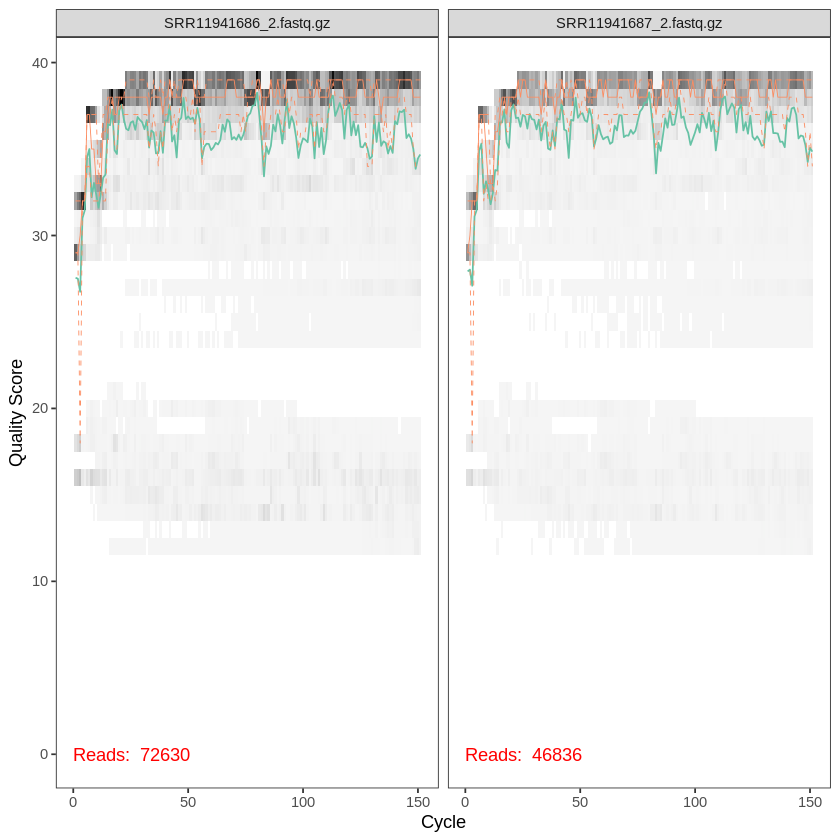

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 164 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 164 rows containing missing values or values outside the scale range
(`geom_line()`).”


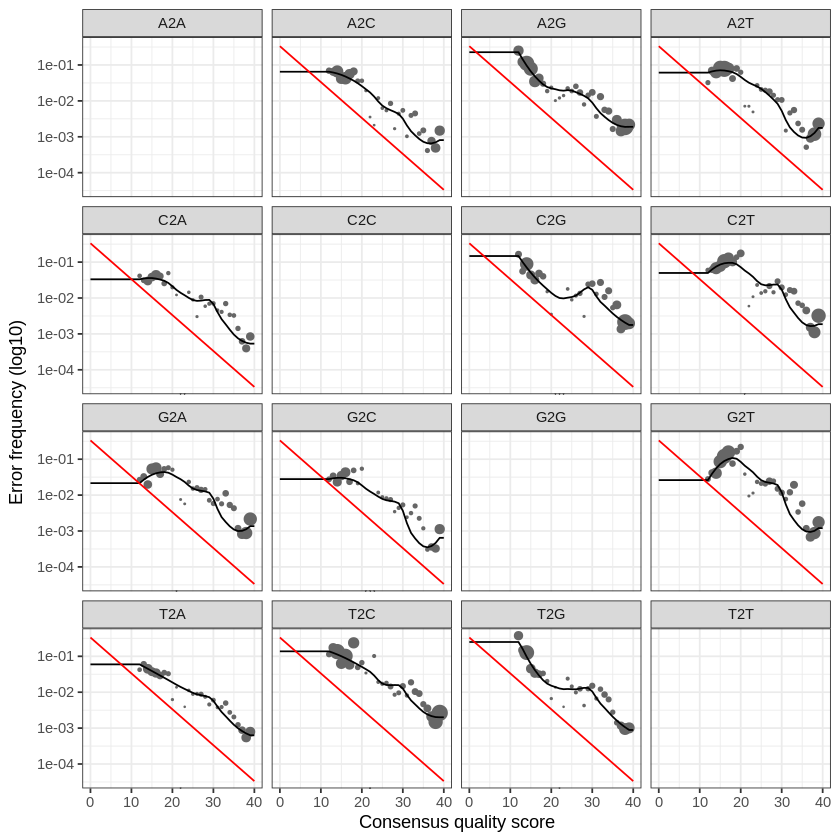

Sample 1 - 72329 reads in 12645 unique sequences.
Sample 2 - 46659 reads in 9895 unique sequences.
Sample 3 - 61168 reads in 12483 unique sequences.
Sample 4 - 39809 reads in 7831 unique sequences.
Sample 5 - 48500 reads in 9485 unique sequences.
Sample 6 - 67195 reads in 12062 unique sequences.
Sample 7 - 48622 reads in 9398 unique sequences.
Sample 8 - 55439 reads in 10551 unique sequences.
Sample 9 - 45975 reads in 9039 unique sequences.
Sample 10 - 62755 reads in 13953 unique sequences.

[5/10] dada F
Elapsed: 423.587 secs | Estimated remaining: 208.6324 secs | Total est.: 632.2194 secs
Sample 1 - 72329 reads in 15678 unique sequences.
Sample 2 - 46659 reads in 11202 unique sequences.
Sample 3 - 61168 reads in 13702 unique sequences.
Sample 4 - 39809 reads in 10813 unique sequences.
Sample 5 - 48500 reads in 12948 unique sequences.
Sample 6 - 67195 reads in 12766 unique sequences.
Sample 7 - 48622 reads in 12433 unique sequences.
Sample 8 - 55439 reads in 11509 unique sequences.
Sa

0 paired-reads (in 0 unique pairings) successfully merged out of 69794 (in 1252 pairings) input.

10 paired-reads (in 3 unique pairings) successfully merged out of 44335 (in 1696 pairings) input.

5 paired-reads (in 2 unique pairings) successfully merged out of 58354 (in 2076 pairings) input.

2 paired-reads (in 1 unique pairings) successfully merged out of 37925 (in 1011 pairings) input.

3 paired-reads (in 1 unique pairings) successfully merged out of 46153 (in 1674 pairings) input.

0 paired-reads (in 0 unique pairings) successfully merged out of 64781 (in 1238 pairings) input.

0 paired-reads (in 0 unique pairings) successfully merged out of 46071 (in 1671 pairings) input.

7 paired-reads (in 3 unique pairings) successfully merged out of 53100 (in 1541 pairings) input.

0 paired-reads (in 0 unique pairings) successfully merged out of 43505 (in 1634 pairings) input.

26 paired-reads (in 11 unique pairings) successfully merged out of 58393 (in 3137 pairings) input.




[7/10] mergePairs + makeSequenceTable
Elapsed: 503.427 secs | Estimated remaining: 81.95323 secs | Total est.: 585.3802 secs


Identified 0 bimeras out of 21 input sequences.




[8/10] removeBimeraDenovo
Elapsed: 503.436 secs | Estimated remaining: 55.93733 secs | Total est.: 559.3733 secs

[9/10] assignTaxonomy + addSpecies
Elapsed: 715.597 secs | Estimated remaining: 22.13187 secs | Total est.: 737.7289 secs

[10/10] Finalize phyloseq + save
Elapsed: 715.639 secs | Estimated remaining: 0 secs | Total est.: 715.639 secs


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 21 taxa and 10 samples ]
sample_data() Sample Data:       [ 10 samples by 6 sample variables ]
tax_table()   Taxonomy Table:    [ 21 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 21 reference sequences ]

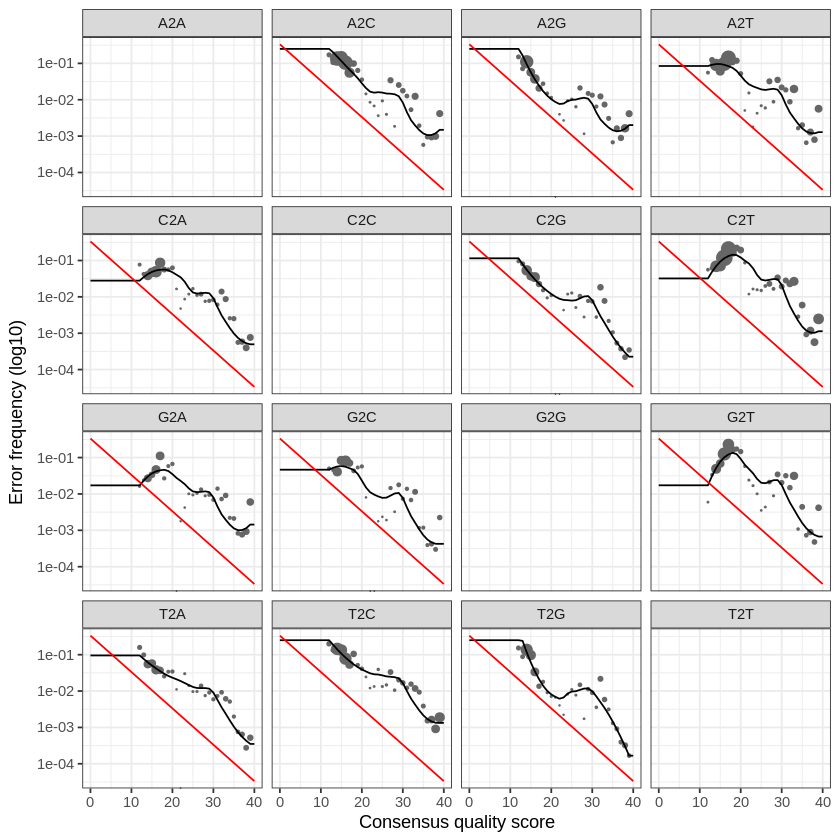

In [ ]:

# =========================
# PART B — DADA2 + OUTPUTS
# =========================

stepsB <- c(
  "Primer/adaptor scan (quick)",
  "filterAndTrim",
  "learnErrors F",
  "learnErrors R",
  "dada F",
  "dada R",
  "mergePairs + makeSequenceTable",
  "removeBimeraDenovo",
  "assignTaxonomy + addSpecies",
  "Finalize phyloseq + save"
)

weightsB <- c(0.05, 0.12, 0.18, 0.18, 0.14, 0.14, 0.05, 0.04, 0.07, 0.03)
PB <- progress_init(stepsB, weightsB)

# speed knobs (fast but still correct)
N_CHECK  <- 2000
NBASES   <- 1e7        # lower = faster learnErrors; 5e6 also ok for speed
TRUNC_LEN <- c(150,150)
MAX_EE   <- c(3,3)

# optional: if you see near-zero merges, reduce minOverlap
MERGE_MIN_OVERLAP <- 12  # try 8 or 6 if merges are ~0

# 6) FASTQ Pair Detection
fwd_pat <- "(_R1_001\\.fastq(\\.gz)?$|_R1\\.fastq(\\.gz)?$|_1\\.fastq(\\.gz)?$)"
rev_pat <- "(_R2_001\\.fastq(\\.gz)?$|_R2\\.fastq(\\.gz)?$|_2\\.fastq(\\.gz)?$)"

all_fastq <- list.files(fastq_dir, pattern = "\\.fastq(\\.gz)?$", full.names = TRUE)
fnFs <- all_fastq[stringr::str_detect(basename(all_fastq), fwd_pat)]
fnRs <- all_fastq[stringr::str_detect(basename(all_fastq), rev_pat)]

sampF <- stringr::str_replace(basename(fnFs), fwd_pat, "")
sampR <- stringr::str_replace(basename(fnRs), rev_pat, "")
rmap  <- setNames(fnRs, sampR)

fnFs <- fnFs[order(sampF)]
sampF <- sampF[order(sampF)]
fnRs <- unname(rmap[sampF])

ok_pairs <- !is.na(fnRs)
fnFs <- fnFs[ok_pairs]
fnRs <- fnRs[ok_pairs]
sample.names <- sampF[ok_pairs]

keep <- sample.names %in% runs
fnFs <- fnFs[keep]
fnRs <- fnRs[keep]
sample.names <- sample.names[keep]

stopifnot(length(fnFs) >= 10, length(fnFs) == length(fnRs))
stopifnot(all(sample.names %in% runs))
stopifnot(all(file.exists(fnFs)), all(file.exists(fnRs)))

# 7) Adapter/Primer Check
FWD <- "GTGCCAGCMGCCGCGGTA"
REV <- "GGACTACNVGGGTWTCTAAT"

illumina_R1 <- "AGATCGGAAGAGCACACGTCTGAACTCCAGTCA"
illumina_R2 <- "AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT"

rc <- function(x) as.character(Biostrings::reverseComplement(Biostrings::DNAString(x)))

patterns <- c(FWD, REV, rc(FWD), rc(REV), illumina_R1, illumina_R2, rc(illumina_R1), rc(illumina_R2))
pat_names <- c("FWD","REV","FWD_rc","REV_rc","ILL_R1","ILL_R2","ILL_R1_rc","ILL_R2_rc")

count_hits <- function(fq, pats, n = 2000) {
  x <- ShortRead::readFastq(fq, n = n)
  s <- Biostrings::DNAStringSet(as.character(ShortRead::sread(x)))
  vapply(pats, function(p) sum(Biostrings::vcountPattern(p, s, fixed = FALSE) > 0), integer(1))
}

z <- timed({
  checks <- lapply(seq_along(sample.names), function(i) {
    cF <- count_hits(fnFs[i], patterns, n = N_CHECK)
    cR <- count_hits(fnRs[i], patterns, n = N_CHECK)
    tibble::tibble(sample = sample.names[i],
                   fileF = basename(fnFs[i]),
                   fileR = basename(fnRs[i]),
                   readset = "F", metric = pat_names, hits = as.integer(cF)) |>
      dplyr::bind_rows(
        tibble::tibble(sample = sample.names[i],
                       fileF = basename(fnFs[i]),
                       fileR = basename(fnRs[i]),
                       readset = "R",
                       metric = pat_names, hits = as.integer(cR))
      )
  })
  check_tbl <- dplyr::bind_rows(checks)
  readr::write_tsv(check_tbl, file.path(work_dir, "adapter_primer_check.tsv"))

  found_any <- check_tbl |>
    dplyr::group_by(sample) |>
    dplyr::summarise(any_hits = any(hits > 0), .groups = "drop") |>
    dplyr::summarise(any_hits = any(any_hits)) |>
    dplyr::pull(any_hits)

  list(check_tbl = check_tbl, found_any = found_any)
})
check_tbl <- z$value$check_tbl
found_any <- z$value$found_any
PB <- progress_step(PB, 1, z$elapsed)

# 8)  Cutadapt Trimming
cutadapt_ok <- nzchar(Sys.which("cutadapt"))

primer_fasta <- file.path(work_dir, "primers.fasta")
writeLines(c(
  paste0(">FWD\n", FWD),
  paste0(">REV\n", REV),
  paste0(">FWD_rc\n", rc(FWD)),
  paste0(">REV_rc\n", rc(REV)),
  paste0(">ILL_R1\n", illumina_R1),
  paste0(">ILL_R2\n", illumina_R2),
  paste0(">ILL_R1_rc\n", rc(illumina_R1)),
  paste0(">ILL_R2_rc\n", rc(illumina_R2))
), primer_fasta)

if(isTRUE(found_any) && cutadapt_ok) {
  cutFs <- file.path(cut_dir, paste0(sample.names, "_R1.cut.fastq.gz"))
  cutRs <- file.path(cut_dir, paste0(sample.names, "_R2.cut.fastq.gz"))
  for(i in seq_along(sample.names)) {
    cmd <- c("-b", paste0("file:", primer_fasta),
             "-B", paste0("file:", primer_fasta),
             "-n", "2",
             "-m", "50",
             "-o", cutFs[i],
             "-p", cutRs[i],
             fnFs[i],
             fnRs[i])
    system2("cutadapt", cmd)
  }
  fnFs <- cutFs
  fnRs <- cutRs
}

# 9) QC Plots
if(length(fnFs) >= 2) {
  dada2::plotQualityProfile(fnFs[1:2])
  dada2::plotQualityProfile(fnRs[1:2])
}

# 10) DADA2 Pipeline (ASV)
filtFs <- file.path(filt_dir, paste0(sample.names, "_F_filt.fastq.gz"))
filtRs <- file.path(filt_dir, paste0(sample.names, "_R_filt.fastq.gz"))

trimL <- if (isTRUE(found_any) && !cutadapt_ok) c(nchar(FWD), nchar(REV)) else c(0, 0)

z <- timed({
  dada2::filterAndTrim(fnFs, filtFs, fnRs, filtRs,
                       truncLen = TRUNC_LEN,
                       trimLeft = trimL,
                       maxN = 0,
                       maxEE = MAX_EE,
                       truncQ = 2,
                       rm.phix = TRUE,
                       compress = TRUE,
                       multithread = TRUE)
})
filt_out <- z$value
PB <- progress_step(PB, 2, z$elapsed)

z <- timed({ dada2::learnErrors(filtFs, multithread = TRUE, nbases = NBASES) })
errF <- z$value
PB <- progress_step(PB, 3, z$elapsed)

z <- timed({ dada2::learnErrors(filtRs, multithread = TRUE, nbases = NBASES) })
errR <- z$value
PB <- progress_step(PB, 4, z$elapsed)

suppressWarnings(dada2::plotErrors(errF, nominalQ = TRUE))
suppressWarnings(dada2::plotErrors(errR, nominalQ = TRUE))

derepFs <- dada2::derepFastq(filtFs)
derepRs <- dada2::derepFastq(filtRs)
names(derepFs) <- sample.names
names(derepRs) <- sample.names

z <- timed({ dada2::dada(derepFs, err = errF, multithread = TRUE) })
dadaFs <- z$value
PB <- progress_step(PB, 5, z$elapsed)

z <- timed({ dada2::dada(derepRs, err = errR, multithread = TRUE) })
dadaRs <- z$value
PB <- progress_step(PB, 6, z$elapsed)

z <- timed({
  mergers <- dada2::mergePairs(dadaFs, derepFs, dadaRs, derepRs,
                              minOverlap = MERGE_MIN_OVERLAP,
                              verbose = TRUE)
  seqtab  <- dada2::makeSequenceTable(mergers)
  list(mergers = mergers, seqtab = seqtab)
})
mergers <- z$value$mergers
seqtab  <- z$value$seqtab
PB <- progress_step(PB, 7, z$elapsed)

z <- timed({
  dada2::removeBimeraDenovo(seqtab, method = "consensus", multithread = TRUE, verbose = TRUE)
})
seqtab.nochim <- z$value
PB <- progress_step(PB, 8, z$elapsed)

getN <- function(x) sum(dada2::getUniques(x))

# robust column naming for filterAndTrim output (fixes "filtered not found")
out_df <- as.data.frame(filt_out)
if(all(c("reads.in","reads.out") %in% colnames(out_df))) {
  out_df <- dplyr::rename(out_df, input = reads.in, filtered = reads.out)
} else if(all(c("input","filtered") %in% colnames(out_df))) {
  out_df <- out_df
} else {
  colnames(out_df)[1:2] <- c("input","filtered")
}

track <- cbind(out_df,
               denoisedF = sapply(dadaFs, getN),
               denoisedR = sapply(dadaRs, getN),
               merged    = sapply(mergers, getN),
               nonchim   = rowSums(seqtab.nochim))

track <- as.data.frame(track)
track$sample <- rownames(track)

track <- dplyr::as_tibble(track) |>
  dplyr::mutate(pct_filtered = 100 * filtered / input,
                pct_denoisedF = 100 * denoisedF / input,
                pct_denoisedR = 100 * denoisedR / input,
                pct_merged = 100 * merged / input,
                pct_nonchim = 100 * nonchim / input) |>
  dplyr::select(sample, dplyr::everything())

readr::write_tsv(track, file.path(work_dir, "read_tracking.tsv"))

reads_per_sample_final <- tibble::tibble(sample = rownames(seqtab.nochim),
                                         reads_final = rowSums(seqtab.nochim))
asv_per_sample <- tibble::tibble(sample = rownames(seqtab.nochim),
                                 asv_detected = rowSums(seqtab.nochim > 0))

readr::write_tsv(reads_per_sample_final, file.path(work_dir, "reads_per_sample_final.tsv"))
readr::write_tsv(asv_per_sample, file.path(work_dir, "asv_per_sample.tsv"))

avg_reads_final <- mean(reads_per_sample_final$reads_final)
avg_asv_sample  <- mean(asv_per_sample$asv_detected)
readr::write_lines(as.character(avg_reads_final), file.path(work_dir, "avg_reads_final.txt"))
readr::write_lines(as.character(avg_asv_sample),  file.path(work_dir, "avg_asv_per_sample.txt"))

# 11) Taxonomy (SILVA 138.1, to Genus)
z <- timed({
  taxa <- dada2::assignTaxonomy(seqtab.nochim, silva_train, multithread = TRUE)
  taxa <- dada2::addSpecies(taxa, silva_species)
  taxa
})
taxa <- z$value
PB <- progress_step(PB, 9, z$elapsed)

genus <- taxa[, "Genus"]
n_unclassified_genus <- sum(is.na(genus) | genus == "" | genus == "unclassified")
readr::write_lines(as.character(n_unclassified_genus), file.path(work_dir, "n_unclassified_genus.txt"))

tax_tbl_out <- as.data.frame(taxa)
readr::write_tsv(tibble::rownames_to_column(tax_tbl_out, "ASV_sequence"),
                 file.path(work_dir, "taxonomy_full_by_sequence.tsv"))

# 12) Rename ASVs sp1..spN
asv_seqs <- colnames(seqtab.nochim)
asv_ids  <- paste0("sp", seq_along(asv_seqs))

colnames(seqtab.nochim) <- asv_ids
stopifnot(all(rownames(taxa) %in% asv_seqs))

rownames(taxa) <- asv_ids[match(rownames(taxa), asv_seqs)]
taxa <- taxa[asv_ids, , drop = FALSE]

asv_dna <- Biostrings::DNAStringSet(asv_seqs)
names(asv_dna) <- asv_ids
Biostrings::writeXStringSet(asv_dna, file.path(work_dir, "ASVs_sp.fasta"))

tax_tbl_out2 <- as.data.frame(taxa)
readr::write_tsv(tibble::rownames_to_column(tax_tbl_out2, "ASV_id"),
                 file.path(work_dir, "taxonomy_by_sp.tsv"))

# 13) Metadata + phyloseq + save RDS
z <- timed({
  meta_tbl <- readr::read_tsv(meta_path, show_col_types = FALSE)

  meta_tbl <- meta_tbl |>
    dplyr::mutate(sample_id = as.character(sample_id)) |>
    dplyr::filter(sample_id %in% sample.names) |>
    dplyr::distinct(sample_id, .keep_all = TRUE)

  stopifnot(all(sample.names %in% meta_tbl$sample_id))


  meta_df <- as.data.frame(meta_tbl)
  rownames(meta_df) <- meta_df$sample_id
  meta_df <- meta_df[sample.names, , drop = FALSE]

  ps <- phyloseq::phyloseq(
    phyloseq::otu_table(seqtab.nochim, taxa_are_rows = FALSE),
    phyloseq::tax_table(taxa),
    phyloseq::sample_data(meta_df),
    phyloseq::refseq(asv_dna)
  )

  saveRDS(ps, file.path(work_dir, "phyloseq_object.rds"))
  ps
})
ps <- z$value
PB <- progress_step(PB, 10, z$elapsed)

ps

In [21]:
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Part 2 — Taxa representation, alpha- and beta-diversity (Genus level)

## Task 1. Selecting the most represented genera
We agglomerated ASVs to the Genus level (tax_glom). Before filtering, the phyloseq object contained 11 genera across 10 samples.  
Filtering criterion: keep genera present in ≥ 50% of samples and reaching ≥ 5% relative abundance in at least one sample.  
After filtering, 5 genera were retained (phyloseq: 5 taxa × 10 samples). Screenshots of the phyloseq object before/after filtering are provided.

## Task 2. Visualizing filtered genera (relative abundance + CLR heatmap)
Figure 1 shows relative abundance of the filtered genera for each sample, faceted by site (Beagle Channel vs Ushuaia Bay).  
A key observation is that the community is dominated by “Unclassified” at the Genus level (limited genus-level taxonomic resolution), so the biological interpretation at genus rank is constrained.
Figure 2 shows a CLR-transformed heatmap. CLR here is computed as log(count + 1) followed by centering within each sample (subtracting the mean log-abundance per sample). This helps compare taxa patterns across samples under compositional constraints.

## Task 3. Alpha-diversity (Observed, Shannon, Simpson) + tests
Alpha-diversity was computed per sample: Observed (number of detected genera), Shannon, and Simpson (vegan::diversity).  
Figure 3 presents boxplots (with points) by site.  
Non-parametric comparisons between the two sites used the Wilcoxon test:
- Observed: p = 0.828
- Shannon: p = 0.906
- Simpson: p = 0.105
Thus, no statistically significant differences in alpha-diversity between sites were detected (p > 0.05).

## Task 4. Beta-diversity (Bray–Curtis) + PCoA + dispersion + PERMANOVA
Bray–Curtis distances were computed on relative abundances.  
Figure 4 (PCoA) shows no clear separation between Beagle Channel and Ushuaia Bay samples; groups overlap.
Figure 5 (Bray–Curtis heatmap) indicates several closer sample pairs, but clustering is not strictly site-specific.

Dispersion test (betadisper) did not detect significant differences in within-group spread (permutest p = 0.5347).  
PERMANOVA (adonis2) also did not detect significant differences in community composition between sites (p = 0.7333; R² ≈ 0.19).

Difference between methods:
- adonis2 tests shifts in group centroids (between-group composition differences);
- betadisper tests differences in within-group dispersion (heterogeneity/spread).


site groups:

Beagle Channel    Ushuaia Bay 
             5              5 

Phyloseq BEFORE filtering (genus level):
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11 taxa and 10 samples ]
sample_data() Sample Data:       [ 10 samples by 7 sample variables ]
tax_table()   Taxonomy Table:    [ 11 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 11 reference sequences ]

Genera kept: 5 out of 11 
Phyloseq AFTER filtering:
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5 taxa and 10 samples ]
sample_data() Sample Data:       [ 10 samples by 7 sample variables ]
tax_table()   Taxonomy Table:    [ 5 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 5 reference sequences ]


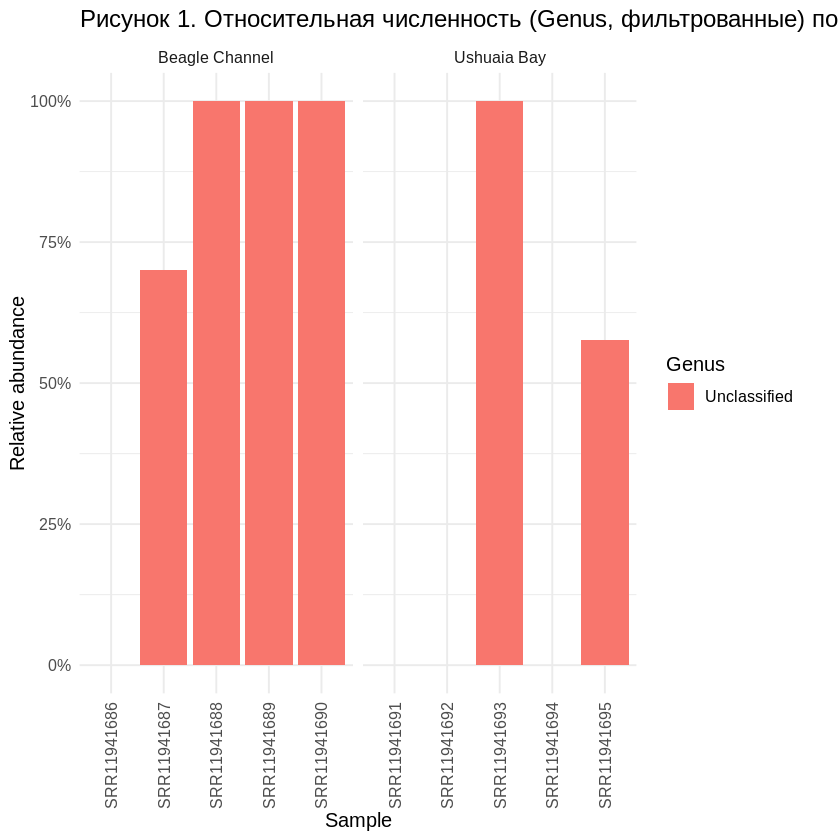


CLR: log(count + 1) и вычитание среднего log по каждому образцу (центрирование).


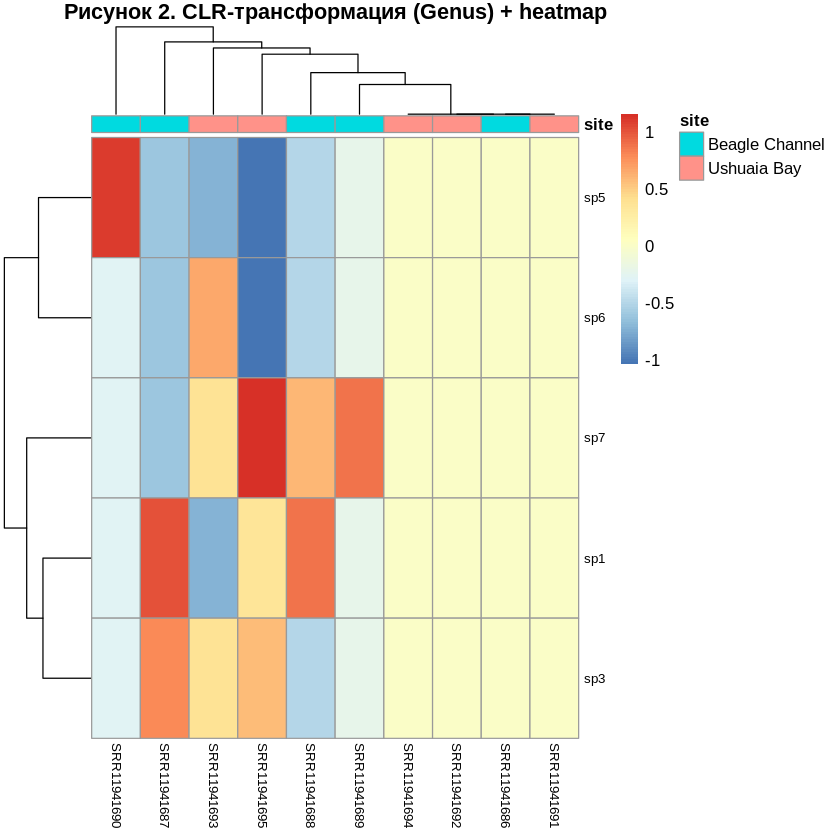


Alpha-diversity tests by site:
# A tibble: 3 × 3
  metric   test     p_value
  <chr>    <chr>      <dbl>
1 Observed Wilcoxon   0.828
2 Shannon  Wilcoxon   0.906
3 Simpson  Wilcoxon   0.105


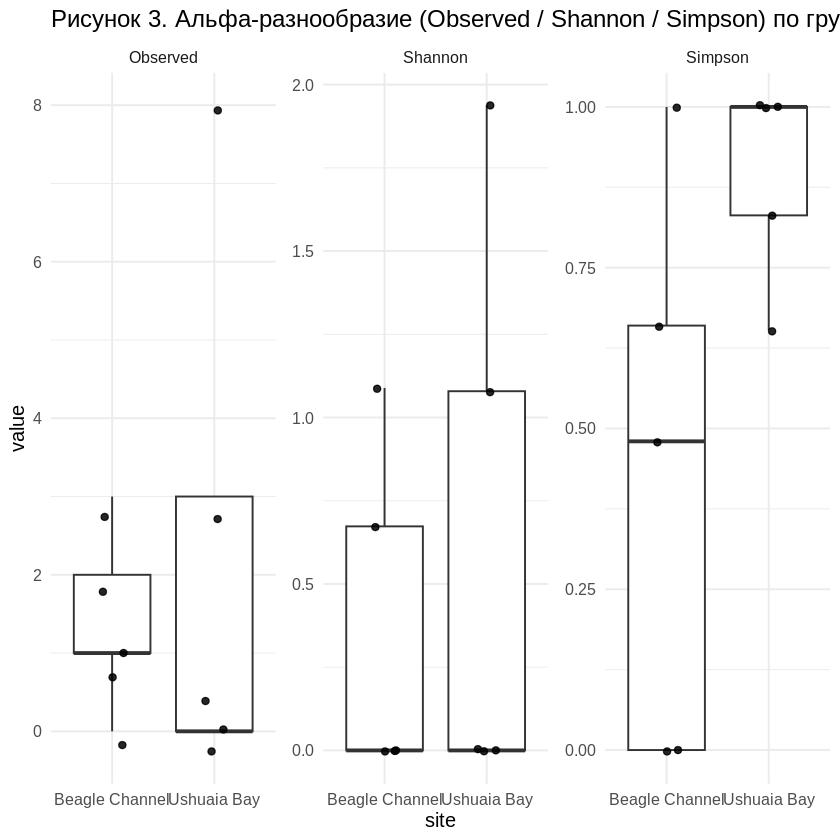

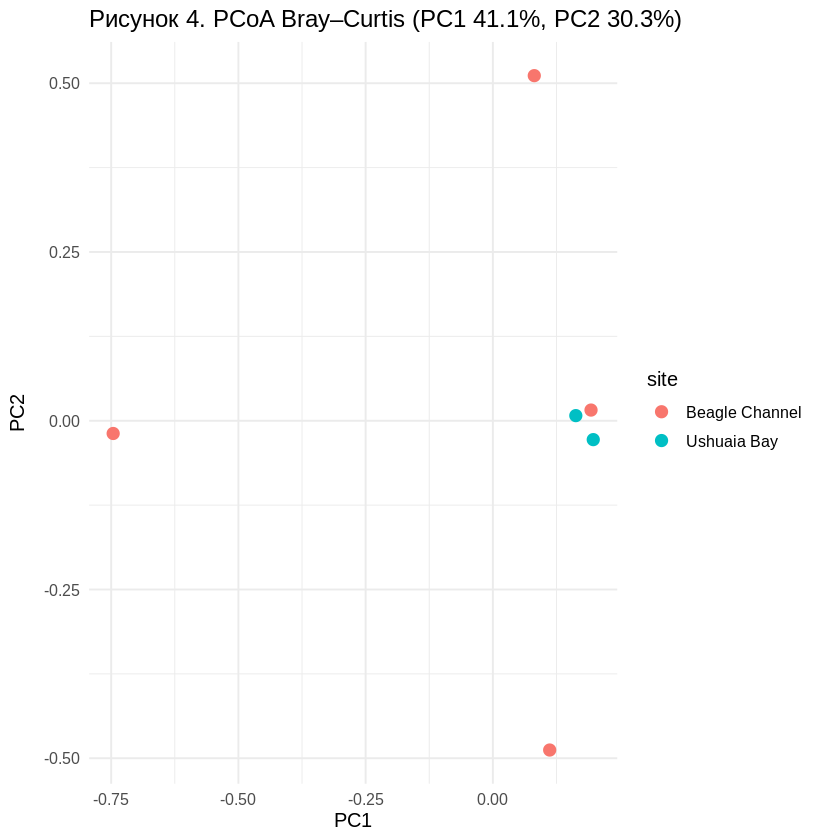


BETADISPER:
Analysis of Variance Table

Response: Distances
          Df   Sum Sq  Mean Sq F value Pr(>F)
Groups     1 0.078527 0.078527  2.0027 0.2299
Residuals  4 0.156839 0.039210               


'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.




Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 719

Response: Distances
          Df   Sum Sq  Mean Sq      F N.Perm Pr(>F)
Groups     1 0.078527 0.078527 2.0027    719 0.5347
Residuals  4 0.156839 0.039210                     

ADONIS2 (PERMANOVA):


'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.



Permutation test for adonis under reduced model
Permutation: free
Number of permutations: 719

vegan::adonis2(formula = bray ~ site, data = meta_bc, permutations = 999)
         Df SumOfSqs      R2      F Pr(>F)
Model     1  0.31476 0.19056 0.9417 0.7333
Residual  4  1.33705 0.80944              
Total     5  1.65181 1.00000              


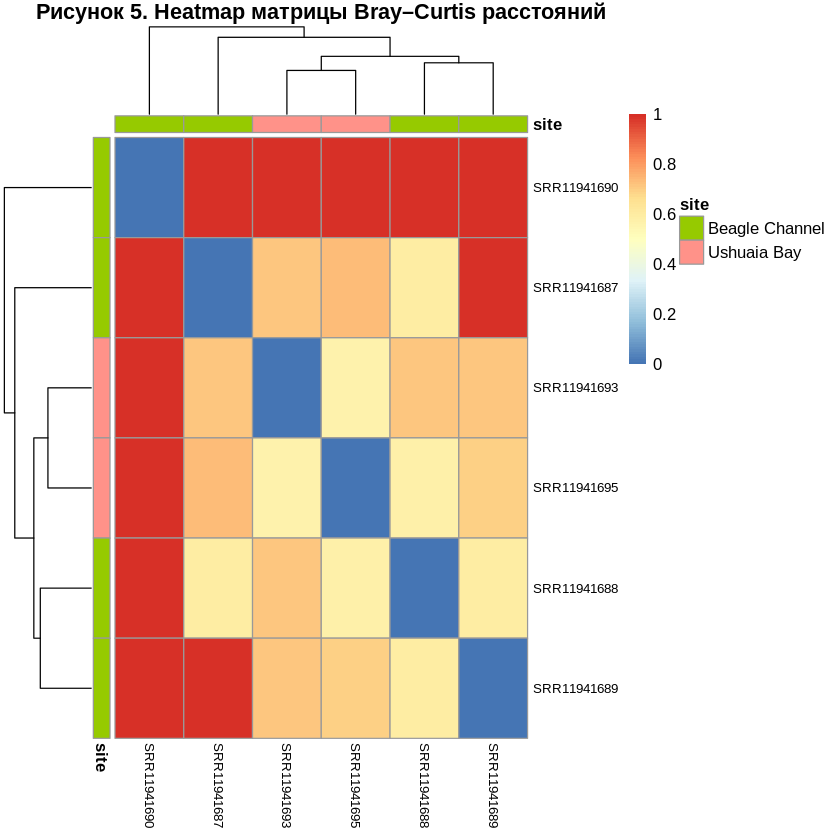

In [38]:
# ==========================================
# PART 2 — TAXA (GENUS), FILTER, BARPLOT, CLR, ALPHA, BETA
# ==========================================

`%||%` <- function(a, b) if (!is.null(a)) a else b

install_if_missing <- function(pkgs){
  for(p in pkgs){
    if(!requireNamespace(p, quietly = TRUE)){
      install.packages(p, quiet = TRUE)
    }
  }
}

# phyloseq is Bioconductor; install via BiocManager if missing
if(!requireNamespace("phyloseq", quietly = TRUE)){
  if(!requireNamespace("BiocManager", quietly = TRUE)) install.packages("BiocManager", quiet = TRUE)
  BiocManager::install("phyloseq", ask = FALSE, update = FALSE)
}

install_if_missing(c(
  "readr","dplyr","stringr","tibble","tidyr",
  "vegan","ggplot2","pheatmap","scales"
))

suppressPackageStartupMessages({
  library(readr)
  library(dplyr)
  library(stringr)
  library(tibble)
  library(tidyr)
  library(phyloseq)
  library(vegan)
  library(ggplot2)
  library(pheatmap)
  library(scales)
})

theme_set(theme_minimal(base_size = 12))

# ---------- load phyloseq ----------
if(!file.exists("work/phyloseq_object.rds")) stop("Missing work/phyloseq_object.rds")
ps <- readRDS("work/phyloseq_object.rds")

# ---------- taxonomy cleanup: ensure Genus has no NA/"" ----------
tt <- as.data.frame(tax_table(ps))
if("Genus" %in% colnames(tt)){
  tt$Genus <- ifelse(is.na(tt$Genus) | tt$Genus == "", "Unclassified", tt$Genus)
  tax_table(ps) <- tax_table(as.matrix(tt))
}

meta_df <- as.data.frame(sample_data(ps))
sample_ids <- rownames(meta_df)

# ---------- ENA read_run metadata: use ONLY valid ENA fields ----------
safe_read_tsv_url <- function(url){
  tryCatch(
    readr::read_tsv(url, show_col_types = FALSE, progress = FALSE),
    error = function(e) NULL
  )
}

ena_filereport_readrun <- function(runs, fields){
  # ENA filereport often supports comma-separated accessions
  url <- paste0(
    "https://www.ebi.ac.uk/ena/portal/api/filereport?",
    "accession=", paste(runs, collapse = ","),
    "&result=read_run",
    "&fields=", paste(fields, collapse = ","),
    "&format=tsv"
  )
  safe_read_tsv_url(url)
}

ena_search_readrun_one <- function(run, fields){
  url <- paste0(
    "https://www.ebi.ac.uk/ena/portal/api/search?",
    "result=read_run",
    "&query=run_accession%3D", run,
    "&fields=", paste(fields, collapse = ","),
    "&format=tsv"
  )
  safe_read_tsv_url(url)
}

infer_site_from_text <- function(...){
  txt <- paste(..., collapse = " ")
  x <- tolower(txt)

  if(str_detect(x, "ushuaia")) return("Ushuaia Bay")
  if(str_detect(x, "beagle"))  return("Beagle Channel")

  # extra safety patterns
  if(str_detect(x, "ushuaia.*bay") || str_detect(x, "bay.*ushuaia")) return("Ushuaia Bay")
  if(str_detect(x, "beagle.*channel") || str_detect(x, "channel.*beagle")) return("Beagle Channel")

  NA_character_
}

# fields that are actually typical for ENA Portal API read_run (avoid geo_loc_name/lat_lon)
ena_fields <- c(
  "run_accession","study_accession","experiment_accession","sample_accession",
  "sample_title","sample_description","collection_date",
  "country","location","lat","lon"
)

run_tbl <- ena_filereport_readrun(sample_ids, ena_fields)

if(is.null(run_tbl) || nrow(run_tbl) == 0){
  # fallback: per-run search endpoint
  run_tbl <- bind_rows(lapply(sample_ids, function(r){
    x <- ena_search_readrun_one(r, ena_fields)
    if(is.null(x) || nrow(x) == 0) tibble(run_accession = r) else x
  }))
}

#  run_accession exists
if(!("run_accession" %in% colnames(run_tbl))){
  run_tbl <- tibble(run_accession = sample_ids)
}

run_tbl <- run_tbl %>%
  distinct(run_accession, .keep_all = TRUE) %>%
  mutate(
    site = vapply(seq_len(n()), function(i){
      infer_site_from_text(
        .data$sample_title[i] %||% "",
        .data$sample_description[i] %||% "",
        .data$location[i] %||% "",
        .data$country[i] %||% ""
      )
    }, character(1))
  )

# stable fallback to 5/5 split
if(all(is.na(run_tbl$site))){
  n <- length(sample_ids)
  run_tbl$site <- ifelse(seq_len(n) <= ceiling(n/2), "Group_A", "Group_B")
} else {
  missing <- is.na(run_tbl$site) | run_tbl$site == ""
  if(any(missing)){
    k <- sum(missing)
    run_tbl$site[missing] <- ifelse(seq_len(k) <= ceiling(k/2), "Group_A", "Group_B")
  }
}

# attach site as a VECTOR
meta_df$site <- run_tbl$site[match(sample_ids, run_tbl$run_accession)]
meta_df$site <- factor(as.character(meta_df$site))
meta_df$site <- droplevels(meta_df$site)

# write back into phyloseq
sample_data(ps) <- sample_data(meta_df)

cat("\nsite groups:\n")
print(table(meta_df$site, useNA="ifany"))

saveRDS(ps, "work/phyloseq_object_with_site.rds")

# ==========================================
# TASK 1 — Genus-level + filtering
# ==========================================
ps_genus <- tax_glom(ps, taxrank = "Genus", NArm = FALSE)

cat("\nPhyloseq BEFORE filtering (genus level):\n")
print(ps_genus)

# relative abundance for filtering criteria
ps_genus_rel <- transform_sample_counts(ps_genus, function(x){
  s <- sum(x)
  if(s == 0) x else x / s
})

otu_rel <- as(otu_table(ps_genus_rel), "matrix")
if(taxa_are_rows(ps_genus_rel)) otu_rel <- t(otu_rel)  # samples x taxa
otu_rel[is.na(otu_rel)] <- 0

prev <- colSums(otu_rel > 0)
maxp <- apply(otu_rel, 2, max)

keep_taxa <- (prev >= ceiling(nsamples(ps_genus_rel)/2)) & (maxp >= 0.05)
keep_taxa[is.na(keep_taxa)] <- FALSE


if(sum(keep_taxa) == 0){
  mean_abund <- colMeans(otu_rel)
  top_n <- min(5, ncol(otu_rel))
  top_idx <- order(mean_abund, decreasing = TRUE)[seq_len(top_n)]
  keep_taxa <- rep(FALSE, ncol(otu_rel))
  keep_taxa[top_idx] <- TRUE
}

ps_genus_filt     <- prune_taxa(keep_taxa, ps_genus)
ps_genus_rel_filt <- prune_taxa(keep_taxa, ps_genus_rel)

cat("\nGenera kept:", sum(keep_taxa), "out of", ntaxa(ps_genus), "\n")
cat("Phyloseq AFTER filtering:\n")
print(ps_genus_filt)

# ==========================================
# TASK 2 — Barplot + CLR heatmap
# ==========================================
df_bar <- as.data.frame(psmelt(ps_genus_rel_filt))
df_bar$Sample <- as.character(df_bar$Sample)
df_bar$Genus  <- as.character(df_bar$Genus)

# add site from meta_df (VECTOR lookup)
df_bar$site <- meta_df$site[match(df_bar$Sample, rownames(meta_df))]
df_bar$site <- as.character(df_bar$site)
df_bar$site[is.na(df_bar$site) | df_bar$site == ""] <- "Unknown"
df_bar$site <- factor(df_bar$site)

p1 <- ggplot(df_bar, aes(x = Sample, y = Abundance, fill = Genus)) +
  geom_bar(stat="identity", width=0.9) +
  facet_grid(. ~ site, scales="free_x", space="free_x") +
  scale_y_continuous(labels = percent_format(accuracy = 1)) +
  labs(
    title = "Рисунок 1. Относительная численность (Genus, фильтрованные) по образцам",
    x = "Sample", y = "Relative abundance"
  ) +
  theme(axis.text.x = element_text(angle=90, vjust=0.5, hjust=1),
        legend.position = "right")
print(p1)

# CLR heatmap uses COUNTS (filtered)
otu_cnt <- as(otu_table(ps_genus_filt), "matrix")
if(taxa_are_rows(ps_genus_filt)) otu_cnt <- t(otu_cnt)  # samples x taxa
otu_cnt[is.na(otu_cnt)] <- 0

clr_transform <- function(mat, pseudocount = 1){
  logm <- log(mat + pseudocount)
  logm - rowMeans(logm)  # per-sample centering
}

clr_mat <- clr_transform(otu_cnt, pseudocount = 1) # samples x taxa
clr_mat_t <- t(clr_mat)                            # taxa x samples

ann_col <- data.frame(site = meta_df$site)
rownames(ann_col) <- rownames(meta_df)
ann_col <- ann_col[colnames(clr_mat_t), , drop = FALSE]

pheatmap(
  clr_mat_t,
  annotation_col = ann_col,
  main = "Рисунок 2. CLR-трансформация (Genus) + heatmap",
  fontsize_row = 8, fontsize_col = 8
)

cat("\nCLR: log(count + 1) и вычитание среднего log по каждому образцу (центрирование).\n")

# ==========================================
# TASK 3 — Alpha diversity + tests
# ==========================================
otu_g <- as(otu_table(ps_genus), "matrix")
if(taxa_are_rows(ps_genus)) otu_g <- t(otu_g)  # samples x taxa
otu_g[is.na(otu_g)] <- 0

alpha_df <- tibble(
  sample   = rownames(otu_g),
  Observed = rowSums(otu_g > 0),
  Shannon  = vegan::diversity(otu_g, index = "shannon"),
  Simpson  = vegan::diversity(otu_g, index = "simpson")
)

# attach site as VECTOR
alpha_df$site <- meta_df$site[match(alpha_df$sample, rownames(meta_df))]
alpha_df$site <- factor(as.character(alpha_df$site))

alpha_long <- alpha_df %>%
  pivot_longer(cols = c(Observed, Shannon, Simpson), names_to = "metric", values_to = "value")

p3 <- ggplot(alpha_long, aes(x = site, y = value)) +
  geom_boxplot(outlier.shape = NA) +
  geom_jitter(width = 0.12, alpha = 0.85) +
  facet_wrap(~metric, scales = "free_y") +
  labs(
    title = "Рисунок 3. Альфа-разнообразие (Observed / Shannon / Simpson) по группам (site)",
    x = "site", y = "value"
  )
print(p3)

do_test <- function(df, metric_col){
  g <- df$site
  x <- df[[metric_col]]
  k <- length(unique(g[!is.na(g)]))
  if(k <= 1) return(list(test = "NA", p = NA_real_))
  if(k == 2) return(list(test = "Wilcoxon", p = wilcox.test(x ~ g, exact = FALSE)$p.value))
  list(test = "Kruskal-Wallis", p = kruskal.test(x ~ g)$p.value)
}

alpha_tests <- tibble(metric = c("Observed","Shannon","Simpson")) %>%
  rowwise() %>%
  mutate(
    test = do_test(alpha_df, metric)$test,
    p_value = do_test(alpha_df, metric)$p
  ) %>%
  ungroup()

cat("\nAlpha-diversity tests by site:\n")
print(alpha_tests)

# ==========================================
# TASK 4 — Beta diversity (Bray) + PCoA + heatmap + betadisper + adonis2
# ==========================================
#  genus-level relative abundance, but REMOVE zero-sum samples first
ps_beta <- ps_genus

# drop samples with 0 total counts (prevents NA Bray)
ps_beta <- prune_samples(sample_sums(ps_beta) > 0, ps_beta)
# drop taxa that are all zero after pruning
ps_beta <- prune_taxa(taxa_sums(ps_beta) > 0, ps_beta)

# relative abundance for Bray
ps_beta_rel <- transform_sample_counts(ps_beta, function(x){
  s <- sum(x)
  if(s == 0) x else x / s
})

otu_rel2 <- as(otu_table(ps_beta_rel), "matrix")
if(taxa_are_rows(ps_beta_rel)) otu_rel2 <- t(otu_rel2)  # samples x taxa
otu_rel2[is.na(otu_rel2)] <- 0

bray <- vegan::vegdist(otu_rel2, method = "bray")


bray_mat <- as.matrix(bray)
if(any(is.na(bray_mat))){
  bad <- which(apply(bray_mat, 1, function(v) any(is.na(v))))
  keep_names <- setdiff(rownames(bray_mat), rownames(bray_mat)[bad])
  otu_rel2 <- otu_rel2[keep_names, , drop = FALSE]
  bray <- vegan::vegdist(otu_rel2, method = "bray")
  bray_mat <- as.matrix(bray)
}

pcoa <- cmdscale(bray, eig = TRUE, k = 2)
var_exp <- (pcoa$eig / sum(pcoa$eig))[1:2] * 100

meta_beta <- as.data.frame(sample_data(ps_beta_rel))
meta_beta$site <- factor(as.character(meta_beta$site))

pcoa_df <- tibble(
  sample = rownames(pcoa$points),
  PC1 = pcoa$points[,1],
  PC2 = pcoa$points[,2],
  site = meta_beta$site[match(rownames(pcoa$points), rownames(meta_beta))]
)

p4 <- ggplot(pcoa_df, aes(PC1, PC2, color = site)) +
  geom_point(size = 3) +
  labs(
    title = sprintf("Рисунок 4. PCoA Bray–Curtis (PC1 %.1f%%, PC2 %.1f%%)", var_exp[1], var_exp[2]),
    x = "PC1", y = "PC2"
  )
print(p4)

ann_bc <- data.frame(site = meta_beta$site)
rownames(ann_bc) <- rownames(meta_beta)
ann_bc <- ann_bc[rownames(bray_mat), , drop = FALSE]

pheatmap(
  bray_mat,
  annotation_row = ann_bc,
  annotation_col = ann_bc,
  main = "Рисунок 5. Heatmap матрицы Bray–Curtis расстояний",
  fontsize_row = 8, fontsize_col = 8
)

# betadisper + PERMANOVA (adonis2)
meta_bc <- data.frame(site = meta_beta$site)
rownames(meta_bc) <- rownames(meta_beta)
meta_bc <- meta_bc[labels(bray), , drop = FALSE]

bd <- vegan::betadisper(bray, group = meta_bc$site)

cat("\nBETADISPER:\n")
print(anova(bd))
print(vegan::permutest(bd, permutations = 999))

cat("\nADONIS2 (PERMANOVA):\n")
print(vegan::adonis2(bray ~ site, data = meta_bc, permutations = 999))

